<a href="https://colab.research.google.com/github/Mrsayem/Cifar-10-classification-/blob/main/Cifar_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [ ]:
results = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(results[y[index]])

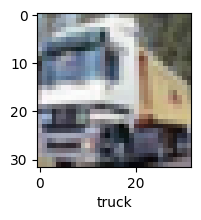

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'cnn' is not defined

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4821 - accuracy: 0.4690
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1247 - accuracy: 0.6064
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9871 - accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8994 - accuracy: 0.6883
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8301 - accuracy: 0.7104
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7714 - accuracy: 0.7308
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7218 - accuracy: 0.7473
Epoch 8/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6795 - accuracy: 0.7621
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6349 - accuracy: 0.7784
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9622 - accuracy: 0.6897


[0.9622166156768799, 0.6897000074386597]

In [ ]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

In [ ]:
y_classes[:5]

[3, 1, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)